In [2]:
from google.colab import files
uploaded = files.upload()

Saving loan prediction.zip to loan prediction.zip


ABHISHEK J - 24BAD002
Files inside ZIP: ['train_u6lujuX_CVtuZ9i (1).csv']

First 5 Rows:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0      

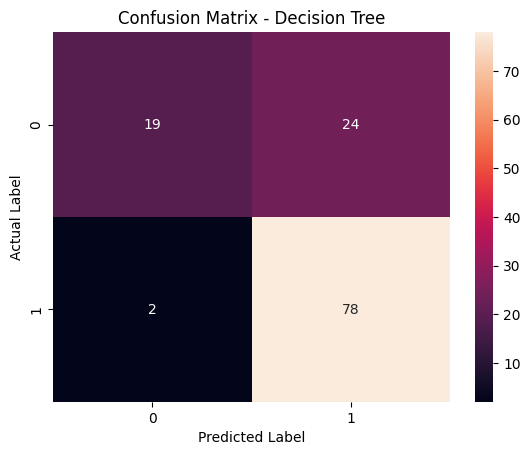

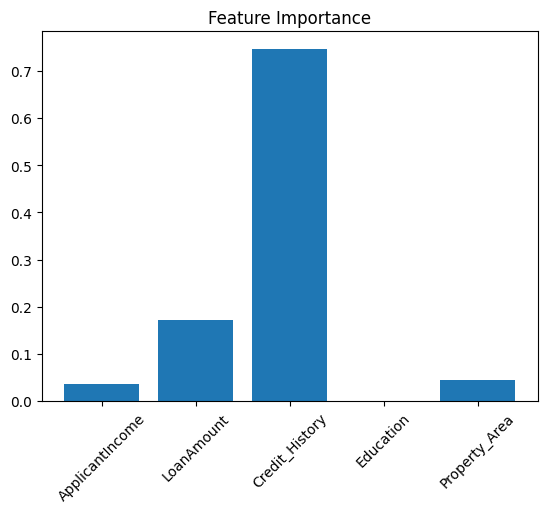

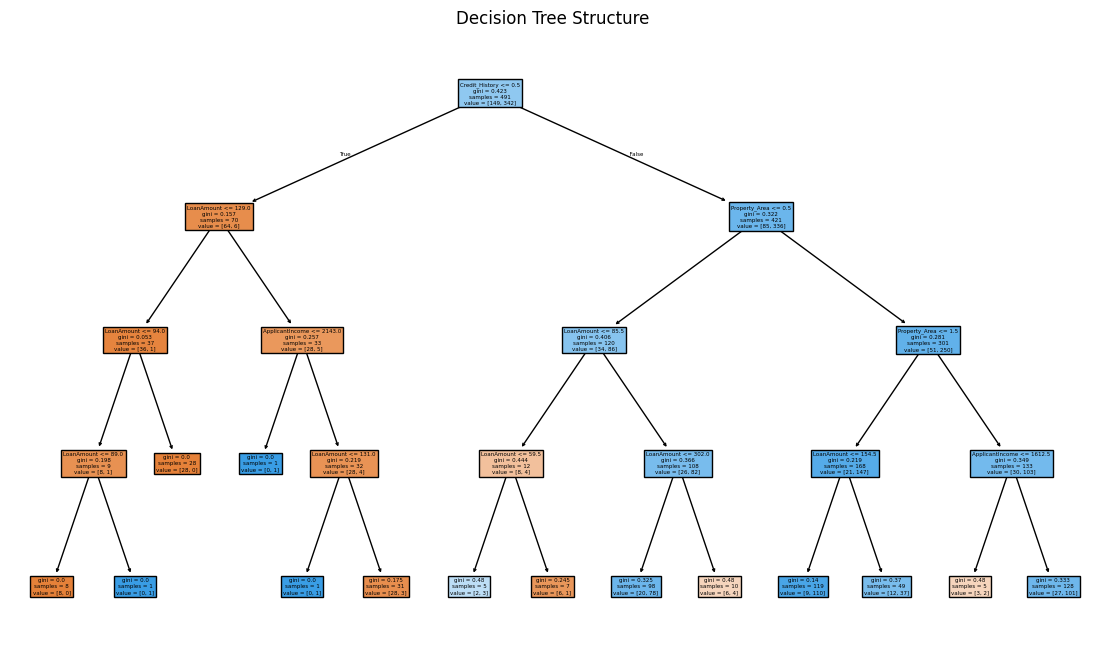

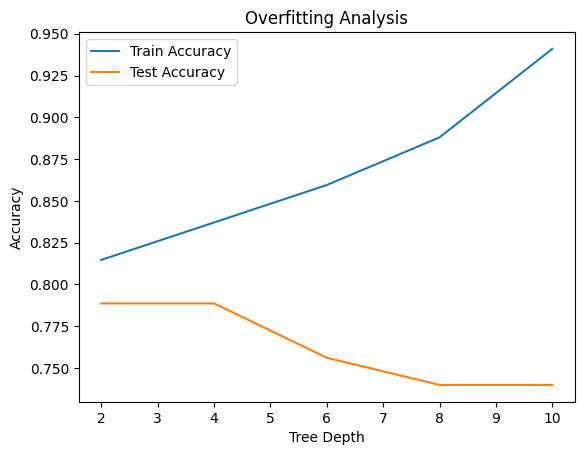

In [3]:
print("ABHISHEK J - 24BAD002")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
zip_path = r"loan prediction.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    print("Files inside ZIP:", zip_ref.namelist())
    csv_name = zip_ref.namelist()[0]
    df = pd.read_csv(zip_ref.open(csv_name))
print("\nFirst 5 Rows:")
print(df.head())
print("\nMissing Values Before:")
print(df.isnull().sum())

df.fillna(df.mode().iloc[0], inplace=True)

print("\nMissing Values After:")
print(df.isnull().sum())
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
X = df[['ApplicantIncome','LoanAmount','Credit_History','Education','Property_Area']]
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()
importances = dt.feature_importances_
features = X.columns
plt.figure()
plt.bar(features, importances)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()
plt.figure(figsize=(14,8))
plot_tree(dt, feature_names=X.columns, filled=True)
plt.title("Decision Tree Structure")
plt.show()
depths = [2,4,6,8,10]
train_acc = []
test_acc = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure()
plt.plot(depths, train_acc, label="Train Accuracy")
plt.plot(depths, test_acc, label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Overfitting Analysis")
plt.show()